In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [2]:
%matplotlib inline

In [3]:
%run initialize_notebook.ipynb

OperationalError: database is locked

In [4]:
%run REMIND_Functions_to_modify_ecoinvent.ipynb

Geomatcher: Used 'AU' for 'AUS'
Geomatcher: Used 'CA' for 'CAN'
Geomatcher: Used 'HM' for 'HMD'
Geomatcher: Used 'NZ' for 'NZL'
Geomatcher: Used 'PM' for 'SPM'
Geomatcher: Used 'CN' for 'CHN'
Geomatcher: Used 'HK' for 'HKG'
Geomatcher: Used 'MO' for 'MAC'
Geomatcher: Used 'TW' for 'TWN'
Geomatcher: Used 'AX' for 'ALA'
Geomatcher: Used 'AT' for 'AUT'
Geomatcher: Used 'BE' for 'BEL'
Geomatcher: Used 'BG' for 'BGR'
Geomatcher: Used 'CY' for 'CYP'
Geomatcher: Used 'CZ' for 'CZE'
Geomatcher: Used 'DE' for 'DEU'
Geomatcher: Used 'DK' for 'DNK'
Geomatcher: Used 'ES' for 'ESP'
Geomatcher: Used 'EE' for 'EST'
Geomatcher: Used 'FI' for 'FIN'
Geomatcher: Used 'FR' for 'FRA'
Geomatcher: Used 'FO' for 'FRO'
Geomatcher: Used 'GB' for 'GBR'
Geomatcher: Used 'GI' for 'GIB'
Geomatcher: Used 'GR' for 'GRC'
Geomatcher: Used 'HR' for 'HRV'
Geomatcher: Used 'HU' for 'HUN'
Geomatcher: Used 'IM' for 'IMN'
Geomatcher: Used 'IE' for 'IRL'
Geomatcher: Used 'IT' for 'ITA'
Geomatcher: Used 'LT' for 'LTU'
Geomatch

In [5]:
databases

Databases dictionary with 13 object(s):
	CSP
	Carma CCS
	biosphere3
	ecoinvent_3.5
	ecoinvent_Remind_BAU_2015
	ecoinvent_Remind_BAU_2030
	ecoinvent_Remind_BAU_2050
	ecoinvent_Remind_RCP26_2015
	ecoinvent_Remind_RCP26_2030
	ecoinvent_Remind_RCP26_2050
	ecoinvent_Remind_RCP37_2030
	ecoinvent_Remind_RCP37_2040
	ecoinvent_Remind_RCP37_2050

In [18]:
database_dict = collections.defaultdict(dict)
database_dict['ecoinvent_3.5'] = {'year' : 2015 , 'scenario' : 'ecoinvent'}

for year in [2015, 2030, 2050]:
    for scenario in ['BAU','RCP26','RCP37']:
        if year == 2015 and scenario != 'BAU':
            continue
        db_name = 'ecoinvent_Remind_' + scenario + '_' + str(year)
        #if db_name in databases:
            #if len(Database(db_name)):
        database_dict[db_name] = {'year' : year , 'scenario' : scenario}

In [19]:
database_dict

defaultdict(dict,
            {'ecoinvent_3.5': {'year': 2015, 'scenario': 'ecoinvent'},
             'ecoinvent_Remind_BAU_2015': {'year': 2015, 'scenario': 'BAU'},
             'ecoinvent_Remind_BAU_2030': {'year': 2030, 'scenario': 'BAU'},
             'ecoinvent_Remind_RCP26_2030': {'year': 2030,
              'scenario': 'RCP26'},
             'ecoinvent_Remind_RCP37_2030': {'year': 2030,
              'scenario': 'RCP37'},
             'ecoinvent_Remind_BAU_2050': {'year': 2050, 'scenario': 'BAU'},
             'ecoinvent_Remind_RCP26_2050': {'year': 2050,
              'scenario': 'RCP26'},
             'ecoinvent_Remind_RCP37_2050': {'year': 2050,
              'scenario': 'RCP37'}})

# LCA of every dataset in every database

In [7]:

cats = ['CC','HT','POF','PMF','MD']
if 0:
    for db_name in database_dict.keys():
        LCIA = 0
        print(db_name)
        try: 
            lca = LCA({Database(db_name).random(): 1}, method=lcia_methods['CC'])
            lca.lci()
            lca.lcia()
            lca.score
            LCIA = LCA_to_df([x for x in Database(db_name)], cats=cats, names=['name', 'location','unit', 'code'])
            LCIA.to_pickle("LCIA_" + db_name+ ".pkl")
        except:
            print(db_name + " failed!")        
            continue

In [12]:
LCIA = {}
for db_name in database_dict:
    try: LCIA[db_name] = pd.read_pickle("LCIA_" + db_name+ ".pkl")
    except: continue

In [13]:
pd.concat(LCIA, axis=1).sort_index()

ecoinvent_3.5  \
                                                                                                                  CC   
1,1-difluoroethane production, HFC-152a            RoW   kilogram     27bf9485ea23adab3c2b08863d2c8acf      5.108155   
                                                   US    kilogram     5ea1977e4f16c61888cc8d601df73f10      6.247985   
1,1-dimethylcyclopentane to generic market for ... GLO   kilogram     fbed8e2c933c0571710b45fc59195440      1.000891   
1-propanol production                              RER   kilogram     5fe587d1d804041f436890288f43a407      3.335970   
                                                   RoW   kilogram     6bebf7c50e8058458f9a54cf90a0d2ef      4.731346   
100% SNG, burned in CC plant, truck 25km, no CC... RER   megajoule    2f4825a7d450e5e66257f331a514b079           NaN   
100% SNG, burned in CC plant, truck 25km, post,... RER   megajoule    b3e5d8e2eff5fa5bfa2ab6ff8b917763           NaN   
100% SNG, burned in CC plant, truck 25km, post,... RER   megajoule    9b50d7a965208658e84ff557cc1c719e           NaN   
2,3-dimethylbutan to generic market for solvent... GLO   kilogram     73057436d3db6bb628f7e3c01e370f87      1.000891   
2,4-di-tert-butylphenol production                 GLO   kilogram     e19efd9f1db5f77e75be4c6ec0a48686      3.407695   
2,4-dichlorophenol production                      RER   kilogram     66f499385c5a47c24beba3f52d298131      3.711921   
                                                   RoW   kilogram     0333f114249887a31a78c5490a4283f7      4.220879   
2,4-dichlorotoluene production                     RER   kilogram     a9271c17c2444edfc5ee358ffa96ba22      2.627765   
                                                   RoW   kilogram     5bf35076770e5296c0e076212be11f31      3.141842   
2,4-dinitrotoluene production                      GLO   kilogram     531a93245668a9f2037987a37597f9c1      2.057169   
                                                                      8eed864c62c791b02fef6d44c8257b4e      5.012011   
2,5-dimethylhexane-2,5-dihydroperoxide production  GLO   kilogram     2a5300def59175c8b9d8c5dbd4423177      4.812633   
2,6-di-tert-butylphenol production                 GLO   kilogram     52163eb19cd271feade6e912ba9dac1f      3.542028   
2-butanol production by hydration of butene        RER   kilogram     c47403521776935c7f24229b8c6dd0f3      3.995547   
                                                                      c4e03a4bc5ed6fa3619780533c69c6bb      1.902641   
                                                   RoW   kilogram     2a866ca7bf3b367216d78bcc9c433b4d      4.376580   
                                                                      3182d64a1fe7d947730110ae3ac93466      2.084086   
2-methyl-2-butanol production                      RER   kilogram     3fd152561bfb6ac233422b4264f93a31      2.622164   
                                                   RoW   kilogram     0fe4b957baa2b4b7f22cb22d2a42e658      3.314976   
2-methylpentane to generic market for solvent, ... GLO   kilogram     b5a59f81b71075780d1e460c839640a2      1.000891   
2-nitroaniline production                          RER   kilogram     e07a828979ed92315bb6a50cfb41b416      5.950415   
                                                   RoW   kilogram     c708a88b8e572a3d8f020b2011253e55      6.583328   
2-pyridinol production                             RER   kilogram     d7808edf22751545c0d4b9869b661d49     98.636632   
                                                   RoW   kilogram     2ba21ff2c26b1d3c41bef59dbf862b9e    102.769066   
3-methyl-1-butyl acetate production                RER   kilogram     805d55364013e392612deef720d9e2f6      5.205922   
...                                                                                                              ...   
yarn production, kenaf                             RoW   kilogram     7e66566721981275b1fbc6a1368f3ec6     -0.496962   
yogurt production, from

In [20]:
LCIA_ratio = {}
for db_name in LCIA.keys():
    if db_name == 'ecoinvent_3.5':
        continue
    LCIA_ratio[db_name] = LCIA[db_name].divide(LCIA['ecoinvent_3.5'])  
LCIA_ratio = pd.concat(LCIA_ratio, axis=1).sort_index()

In [25]:
LCIA_ratio.describe().T.swaplevel(axis=0).sort_index()
 

count      mean        std          min  \
CC  ecoinvent_Remind_BAU_2015    15414.0  1.085712   5.183857  -252.785963   
    ecoinvent_Remind_BAU_2030    15414.0  0.973749   9.947401  -437.703817   
    ecoinvent_Remind_BAU_2050    15414.0  0.905276  15.000515  -703.268249   
    ecoinvent_Remind_RCP26_2030  15414.0  0.853096  18.095029  -827.384769   
    ecoinvent_Remind_RCP26_2050  15414.0  0.796877  22.008232 -1036.149172   
    ecoinvent_Remind_RCP37_2030  15414.0  0.938271  13.631556  -594.207739   
    ecoinvent_Remind_RCP37_2050  15414.0  0.896366  17.025605  -814.645050   
HT  ecoinvent_Remind_BAU_2015    15375.0  1.129955   1.667096    -1.261057   
    ecoinvent_Remind_BAU_2030    15375.0  1.011067   0.963552    -2.304950   
    ecoinvent_Remind_BAU_2050    15375.0  0.926391   0.596930    -4.668934   
    ecoinvent_Remind_RCP26_2030  15375.0  0.820623   0.379246    -8.378171   
    ecoinvent_Remind_RCP26_2050  15375.0  0.844983   0.581146    -8.493288   
    ecoinvent_Remind_RCP37_2030  15375.0  0.954136   1.165921    -4.946817   
    ecoinvent_Remind_RCP37_2050  15375.0  0.820612   1.077176    -8.647890   
MD  ecoinvent_Remind_BAU_2015    15246.0  1.003395   0.112048    -0.000000   
    ecoinvent_Remind_BAU_2030    15246.0  1.028239   0.574732   -66.402130   
    ecoinvent_Remind_BAU_2050    15246.0  1.102743   0.418167   -21.385929   
    ecoinvent_Remind_RCP26_2030  15246.0  1.110011   1.217871     0.000000   
    ecoinvent_Remind_RCP26_2050  15246.0  1.230126   0.682782   -21.506630   
    ecoinvent_Remind_RCP37_2030  15246.0  1.064495   1.184849    -0.629970   
    ecoinvent_Remind_RCP37_2050  15246.0  1.118282   0.370294    -0.000000   
PMF ecoinvent_Remind_BAU_2015    15350.0  1.154460   1.888733    -0.000000   
    ecoinvent_Remind_BAU_2030    15350.0  0.931963   1.112472   -15.239904   
    ecoinvent_Remind_BAU_2050    15350.0  0.770537   0.451877    -3.170051   
    ecoinvent_Remind_RCP26_2030  15350.0  0.749844   0.285622     0.000000   
    ecoinvent_Remind_RCP26_2050  15350.0  0.720042   0.282884    -0.032772   
    ecoinvent_Remind_RCP37_2030  15350.0  0.968978   0.916979    -0.418374   
    ecoinvent_Remind_RCP37_2050  15350.0  0.959177   0.926253    -3.624676   
POF ecoinvent_Remind_BAU_2015    15339.0  1.112673   2.171544    -0.000000   
    ecoinvent_Remind_BAU_2030    15339.0  0.932700   0.726474    -5.039428   
    ecoinvent_Remind_BAU_2050    15339.0  0.840148   0.373115    -1.715892   
    ecoinvent_Remind_RCP26_2030  15339.0  0.820996   0.309224     0.000000   
    ecoinvent_Remind_RCP26_2050  15339.0  0.792507   0.286206    -0.000000   
    ecoinvent_Remind_RCP37_2030  15339.0  0.950470   0.951416    -0.407352   
    ecoinvent_Remind_RCP37_2050  15339.0  0.933064   0.912672    -7.342789   

                                      25%       50%       75%          max  
CC  ecoinvent_Remind_BAU_2015    0.912534  0.969827  0.999557   533.333768  
    ecoinvent_Remind_BAU_2030    0.814965  0.931485  0.996984  1130.997827  
    ecoinvent_Remind_BAU_2050    0.714520  0.884279  0.992388  1715.259682  
    ecoinvent_Remind_RCP26_2030  0.647101  0.851870  0.984811  2079.265061  
    ecoinvent_Remind_RCP26_2050  0.549586  0.806118  0.977757  2516.684033  
    ecoinvent_Remind_RCP37_2030  0.743890  0.898621  0.994204  1575.693272  
    ecoinvent_Remind_RCP37_2050  0.690035  0.870291  0.990977  1940.943322  
HT  ecoinvent_Remind_BAU_2015    0.928369  0.966461  0.995973    51.388954  
    ecoinvent_Remind_BAU_2030    0.896118  0.949462  0.988108    24.807339  
    ecoinvent_Remind_BAU_2050    0.830871  0.914519  0.977775    22.037334  
    ecoinvent_Remind_RCP26_2030  0.723406  0.855084  0.954227    15.122963  
    ecoinvent_Remind_RCP26_2050  0.724246  0.856555  0.956038    21.256557  
    ecoinvent_Remind_RCP37_2030  0.826406  0.913553  0.976109    73.477259  
    ecoinvent_Remind_RCP37_2050  0.720355  0.856891  0.951686    75.673440  
MD  ecoinvent_Remind_BAU_2015    0.998099  0.999671  0.999996     3.793

Let's look at the processes that get much better - ie large negative ratios:

In [26]:
LCIA_ratio.swaplevel(axis=1)['CC'].min(axis=1).sort_values()[:20]

market for almond                                                              GLO    kilogram      db2ed6cede66213657354cbe793f6700   -1036.149172
market for sulfidic tailing, off-site                                          GLO    kilogram      c52df2a767385ca1a9154c0dc9623b9e    -174.240922
market for maize seed, organic, at farm                                        GLO    kilogram      9f30881dc5e8ad27e2cec7bf3e5576f2    -110.103753
market for dried roughage store, non ventilated                                GLO    cubic meter   a794e87cf8e5997ddc2b1d247ce8c166    -107.974198
containerboard production, fluting medium, semichemical, 40% recycled content  CA-QC  kilogram      698f7807ac0f73d325196ff0671269b9     -65.298496
market for containerboard, fluting medium                                      CA-QC  kilogram      232b01ad6d04fd071fe7f9c1488fe1a0     -65.298496
maize seed production, at farm                                                 GLO    kilogram      81e6b0dcfdac

In [58]:
LCIA_ratio.swaplevel(axis=1)['HT'].loc[LCIA_ratio.swaplevel(axis=1)['HT'].min(axis=1).sort_values()[:10].index]

ecoinvent_Remind_BAU_2015  \
rape seed production                               CA-QC kilogram      77d75ea2677ec486b02b1e9b7967b88b                  -1.222923   
electricity voltage transformation from high to... PY    kilowatt hour 5629ecc6d42f12c7f9e153a33a164df6                  20.123095   
market for electricity, high voltage               PY    kilowatt hour 884b8f28200f7c8f37ea71702c3ce7b4                  20.123095   
market for fodder beet, Swiss integrated produc... GLO   kilogram      d45642c959dfdcee60badbd7463885d5                  -1.261057   
market for vanilla seedling, for planting          GLO   unit          9988ff7c804726407a6080e5cb3cbd26                  -0.270873   
sugar beet production                              RoW   kilogram      d1850b9a07fb6b558158516b077b288d                  -0.342218   
market for electricity, medium voltage             PY    kilowatt hour 1c9d6006457ca084611f7d1390d8f179                   6.948633   
electricity voltage transformation from medium ... PY    kilowatt hour dd4ce64ab13e8404184ab880ac4aea08                   6.948633   
market for electricity, high voltage               BO    kilowatt hour 931e21f578c0c0f96437ef40a1fffd54                   4.602184   
electricity voltage transformation from high to... BO    kilowatt hour 9cdd12496bc209533196fb24da3d0300                   4.602184   

                                                                                                         ecoinvent_Remind_BAU_2030  \
rape seed production                               CA-QC kilogram      77d75ea2677ec486b02b1e9b7967b88b                  -2.304950   
electricity voltage transformation from high to... PY    kilowatt hour 5629ecc6d42f12c7f9e153a33a164df6                  21.880500   
market for electricity, high voltage               PY    kilowatt hour 884b8f28200f7c8f37ea71702c3ce7b4                  21.880500   
market for fodder beet, Swiss integrated produc... GLO   kilogram      d45642c959dfdcee60badbd7463885d5                  -2.218329   
market for vanilla seedling, for planting          GLO   unit          9988ff7c804726407a6080e5cb3cbd26                  -0.759772   
sugar beet production                              RoW   kilogram      d1850b9a07fb6b558158516b077b288d                  -0.805572   
market for electricity, medium voltage             PY    kilowatt hour 1c9d6006457ca084611f7d1390d8f179                   7.494902   
electricity voltage transformation from medium ... PY    kilowatt hour dd4ce64ab13e8404184ab880ac4aea08                   7.494902   
market for electricity, high voltage               BO    kilowatt hour 931e21f578c0c0f96437ef40a1fffd54                   5.004105   
electricity voltage transformation from high to... BO    kilowatt hour 9cdd12496bc209533196fb24da3d0300                   5.004105   

                                                                                                         ecoinvent_Remind_BAU_2050  \
rape seed production                               CA-QC kilogram      77d75ea2677ec486b02b1e9b7967b88b                  -4.668934   
electricity voltage transformation from high to... PY    kilowatt hour 5629ecc6d42f12c7f9e153a33a164df6                  22.037334   
market for electricity, high voltage               PY    kilowatt hour 884b8f28200f7c8f37ea71702c3ce7b4                  22.037334   
market for fodder beet, Swiss integrated produc... GLO   kilogram      d45642c959dfdcee60badbd7463885d5                  -4.638255   
market for vanilla seedling, for planting          GLO   unit          9988ff7c804726407a6080e5cb3cbd26                  -1.915517   
sugar beet production                              RoW   kilogram      d1850b9a07fb6b558158516b077b288d                  -1.909138   
market for electricity, medium voltage             PY    kilowatt hour 1c9d6006457ca084611f7d1390d8f179                   7.542824   
electricity voltage transformation from medium ... PY    kilowatt hour dd4ce64ab13e

In [35]:
db = Database(db_name)

In [54]:
code = '76803cf2f7d04053d431e7e3336c966d'

In [55]:
def do_LCA_for_all_databases(code, cats = ['CC']):
    temp = {}
    for db_name in database_dict:
        print(db_name)
        db = Database(db_name)
        ds= db.get(code)
        lca = LCA({ds: 1}, method=lcia_methods['CC'])
        lca.lci()
        lca.lcia()
        temp[db_name] = contribution_LCA_to_df([ds], cats=cats, names=['code'])
    return pd.concat(temp).reset_index(level=1, drop=True)

In [56]:
do_LCA_for_all_databases(code, cats = ['CC'])

ecoinvent_3.5


OutsideTechnosphere: Can't find key 'market for maize seed, Swiss integrated production, at farm' (kilogram, GLO, None) in product dictionary

In [20]:
LCIA_ratio = {}
for db_name in LCIA.keys():
    if db_name == 'ecoinvent_3.5':
        continue
    LCIA_ratio[db_name] = LCIA[db_name].divide(LCIA['ecoinvent_3.5'])  
LCIA_ratio = pd.concat(LCIA_ratio, axis=1).sort_index()

CC  \
1,1-difluoroethane production, HFC-152a            RoW   kilogram     27bf9485ea23adab3c2b08863d2c8acf  0.918717   
                                                   US    kilogram     5ea1977e4f16c61888cc8d601df73f10  0.876825   
1,1-dimethylcyclopentane to generic market for ... GLO   kilogram     fbed8e2c933c0571710b45fc59195440  0.965272   
1-propanol production                              RER   kilogram     5fe587d1d804041f436890288f43a407  0.950664   
                                                   RoW   kilogram     6bebf7c50e8058458f9a54cf90a0d2ef  0.914675   
2,3-dimethylbutan to generic market for solvent... GLO   kilogram     73057436d3db6bb628f7e3c01e370f87  0.965272   
2,4-di-tert-butylphenol production                 GLO   kilogram     e19efd9f1db5f77e75be4c6ec0a48686  0.951556   
2,4-dichlorophenol production                      RER   kilogram     66f499385c5a47c24beba3f52d298131  0.912393   
                                                   RoW   kilogram     0333f114249887a31a78c5490a4283f7  0.892215   
2,4-dichlorotoluene production                     RER   kilogram     a9271c17c2444edfc5ee358ffa96ba22  0.913915   
                                                   RoW   kilogram     5bf35076770e5296c0e076212be11f31  0.887316   
2,4-dinitrotoluene production                      GLO   kilogram     531a93245668a9f2037987a37597f9c1  0.936320   
                                                                      8eed864c62c791b02fef6d44c8257b4e  0.936320   
2,5-dimethylhexane-2,5-dihydroperoxide production  GLO   kilogram     2a5300def59175c8b9d8c5dbd4423177  0.909736   
2,6-di-tert-butylphenol production                 GLO   kilogram     52163eb19cd271feade6e912ba9dac1f  0.952121   
2-butanol production by hydration of butene        RER   kilogram     c47403521776935c7f24229b8c6dd0f3  0.990048   
                                                                      c4e03a4bc5ed6fa3619780533c69c6bb  0.990048   
                                                   RoW   kilogram     2a866ca7bf3b367216d78bcc9c433b4d  0.977972   
                                                                      3182d64a1fe7d947730110ae3ac93466  0.977972   
2-methyl-2-butanol production                      RER   kilogram     3fd152561bfb6ac233422b4264f93a31  0.983090   
                                                   RoW   kilogram     0fe4b957baa2b4b7f22cb22d2a42e658  0.972466   
2-methylpentane to generic market for solvent, ... GLO   kilogram     b5a59f81b71075780d1e460c839640a2  0.965272   
2-nitroaniline production                          RER   kilogram     e07a828979ed92315bb6a50cfb41b416  0.956936   
                                                   RoW   kilogram     c708a88b8e572a3d8f020b2011253e55  0.941809   
2-pyridinol production                             RER   kilogram     d7808edf22751545c0d4b9869b661d49  0.948488   
                                                   RoW   kilogram     2ba21ff2c26b1d3c41bef59dbf862b9e  0.941653   
3-methyl-1-butyl acetate production                RER   kilogram     805d55364013e392612deef720d9e2f6  0.951991   
                                                   RoW   kilogram     ac898354de7ff750504b0753b6003038  0.950038   
4-methyl-2-pentanone production                    RER   kilogram     1f93dc50d9d8daf432ae39935da276d4  0.980282   
                                                   RoW   kilogram     9221f80b15c861f70b6ebd6f0830d8ad  0.952327   
...                                                                                                          ...   
yarn production, kenaf                             RoW   kilogram     7e66566721981275b1fbc6a1368f3ec6  3.382141   
yogurt production, from cow milk                   CA-QC kilogram     2326eba3216f5662708a6d14c7384b8f  0.725608   
                                                                      6e56d951765f47ffab05375382bc9038  0.725608   
                                                  

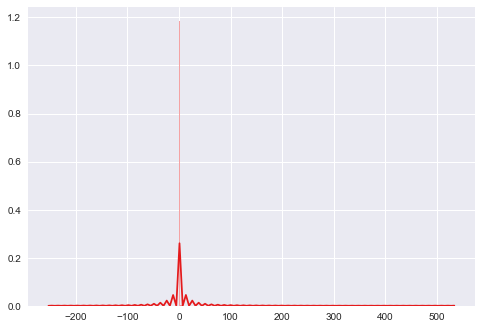

In [82]:
sns.distplot(LCIA_ratio.dropna(how = 'all', axis=0), bins = 1000)

AttributeError: 'list' object has no attribute 'set_ylim'

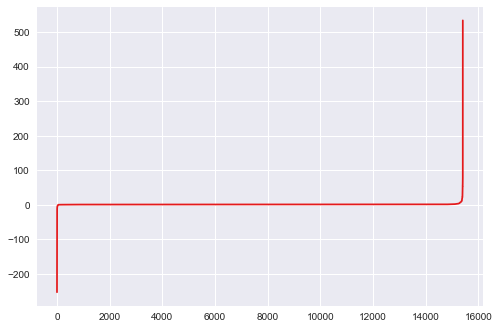

In [105]:
y= LCIA_ratio.dropna(how = 'all', axis=0)['ecoinvent_Remind_BAU_2015']['CC'].sort_values().values
x = np.arange(0,len(y))
ax = plt.plot(x,y)
ax.set_ylim(-5,5)

In [95]:
len(y)

15414

In [96]:
len(x)

15414